In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import wandb
import matplotlib.pyplot as plt

api = wandb.Api()

## Plot Runtimes

In [3]:
def plot_runtimes(runtimes, labels):
    plt.figure(figsize=(10, 6))

    x = np.arange(len(runtimes))
    colors = plt.cm.get_cmap('Set3', len(runtimes))

    # Find the index of the slowest method
    slowest_idx = np.argmax(runtimes)
    slowest_time = runtimes[slowest_idx]

    # Calculate speedup percentage for each method
    speedups = [(slowest_time - t) / slowest_time * 100 for t in runtimes]

    # Sort runtimes and labels based on slowest to fastest
    runtimes_sorted, labels_sorted, speedups_sorted = zip(*sorted(zip(runtimes, labels, speedups), reverse=True))

    bars = plt.bar(x, runtimes_sorted, color=colors(x))
    plt.xticks(x, labels_sorted, rotation='horizontal', fontsize=16)
    plt.xlabel('Methods', fontsize=18)
    plt.ylabel('Runtime (seconds)', fontsize=18)
    plt.title('Runtimes of Methods per Epoch', fontsize=20)
    plt.grid(False)

    # Add text on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{speedups_sorted[i]:.1f}%', ha='center', va='bottom', fontsize=16)

    plt.tight_layout()
    plt.savefig('runtimes_v100.pdf', format='pdf')

    plt.show()

In [4]:
# 3090
runtimes = [44.44, 42.25, 39.02, 35.63,]
#37.35]
labels = ['Baseline', 'AMP', 'Half-Precision FNO (Half)', 'AMP + Half',]
#'AMP + HP + full-FFT']

#plot_runtimes(runtimes, labels)

/var/folders/4v/hnwq99yn1kv2xbbc7ksr22840000gn/T/ipykernel_39080/2797084506.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(runtimes))


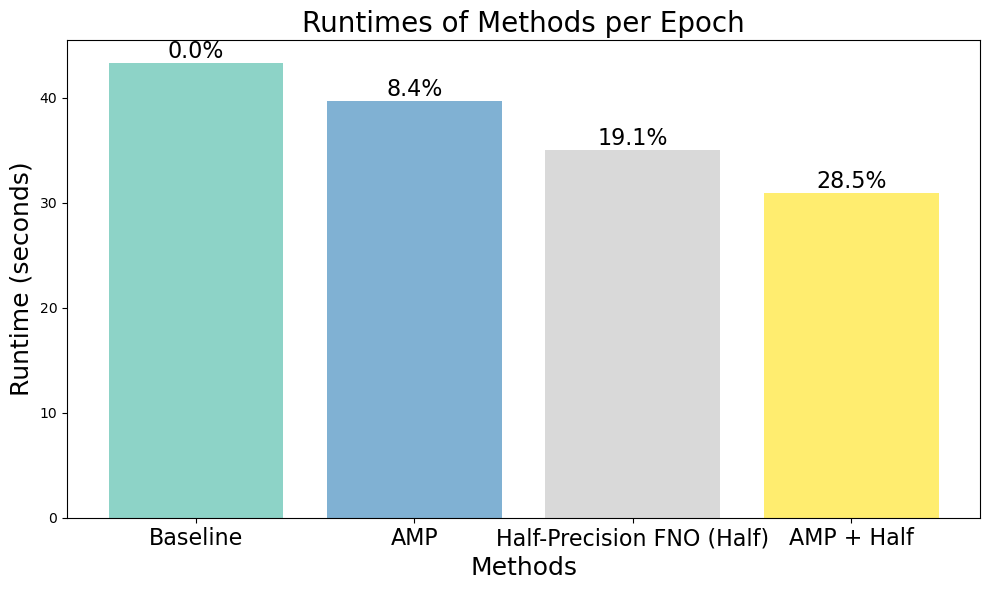

In [5]:
# v100
runtimes = [43.3, 39.65, 35.01, 30.96,]
#37.8]

labels = ['Baseline', 'AMP', 'Half-Precision FNO (Half)', 'AMP + Half',]
#'AMP + HP + full-FFT']

plot_runtimes(runtimes, labels)